In [3463]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
import math

In [3464]:
def run_md(N_atoms, r, T, m, size, density, step, delta_step, dt):
    """
    MD program using velocity verlet algorithm
    N_atoms = number_of_atoms
    f = force_of_particles
    r = distance_between_particles
    T = Boltzmann_temperature
    m = mass_of_particle
    size = size_of_the_box
    density = density_of_particles
    step = number_of_steps
    delta_step = frequency_in_steps
    dt = time_step
    """
    
    # initialize positions
    positions = initialize_positions(N_atoms, size)
    
    # initialize velocities
    velocities = initialize_velocities(m, kB, T)
    
    # Main MD loop
     # open trajectory file
    traj_file = open("traj_MD.xyz", 'w')
    for steps in range(step):
    
        # Propagate Positions
        update_positions(positions, velocities, f, dt, size)
        
        # Propagate Velocities
        update_velocities(velocities, f, dt)
        
        if (step%delta_step==0):
            write_trajectory_frame(positions, traj_file, step)
    
        # close trajectory file
        traj_file.close()
        return traj_file

In [3505]:
#################Sub-Routines#################

# initialize positions
def initialize_positions(N_atoms, size):
    """Initialize positions"""
    return np.random.rand(N_atoms, 10) * size

In [3506]:
positions = initialize_positions(2,10)
print(positions)

[[6.42956333 2.33585358 3.52838167 3.59787581 2.11858191 7.92866454
  4.42447511 5.22340037 1.50350943 8.32936715]
 [6.41199887 1.60782729 3.01029107 8.3224696  5.34378652 5.23931426
  6.97078285 8.84832258 5.10072839 0.63062498]]


In [3507]:
def compute_forces(positions, f, size):
    """
    Compute forces
    epsilon = welldepth of the particles
    sigma = distance at which potential is zero
    r = distance between two particles
    """
    N = 2 
    size = 10
    r6 = (sigma / r) ** 6
    r12 = r6 ** 2
    f = -24 * epsilon * (2 * r12 - r6) / r
    return f

In [3508]:
epsilon = 1
sigma = 1
r = sigma
r6 = (sigma / r) ** 6
r12 = r6 ** 2
f = -24 * epsilon * (2 * r12 - r6) / r
print(f)

-24.0


In [3509]:
# initialize velocities
def initialize_velocities(m, kB, T):
    """
    kB = boltzmann_temp
    """
    velocities = np.random.normal(loc=0, scale=1, size=(N_atoms, 10)) * np.sqrt(kB*T/m)
    return velocities

In [3510]:
N_atoms = 2
kB = 0.08314
T = 300
m = 12
velocities = np.random.normal(loc=0, scale=np.sqrt(T), size=(N_atoms,10))
print(velocities)

[[  9.06116428 -19.79646868  -0.68249525  23.22563008  23.8887584
  -18.06699301 -31.01299171  10.63497409   4.82963769  -4.04226206]
 [ 23.44596854   7.65985475  17.36997716   0.59826894   4.263398
   13.10090059  49.9268269   12.84410327  -8.39640465  16.92945199]]


In [3511]:
# Propagate Positions
def update_positions(positions, velocities, dt, f, size):
    """
    positions = particle_positions
    velocities = particle_velocities
    dt = time_step
    f = force
    size = size_of_box
    """
    positions += velocities * dt + 0.5 * f * dt**2
    
     # wrap into central box (box is from 0 to size in each dimension)
    for i in range(N):
        for j in range(N):
            if positions[i,j] < 0:
                positions[i,j] += size
            elif positions[i,j] > size:
                positions[i,j] -= size
    return positions

In [3512]:
dt = 0.01
size = 2
f = -24 * epsilon * (2 * r12 - r6) / r
positions += velocities * dt + 0.5 * f * dt**2

In [3513]:
print(positions)

[[6.51897497 2.13668889 3.52035671 3.82893211 2.3562695  7.74679461
  4.1131452  5.32855011 1.55060581 8.28774453]
 [6.64525856 1.68322583 3.18279084 8.32725229 5.3852205  5.36912326
  7.46885112 8.97556362 5.01556434 0.7987195 ]]


In [3514]:
# Propagate Velocities
def update_velocities(velocities, f, dt):
    """
    velocities = particle_velocities
    f = forces
    dt = time_step
    
    """
    velocities += f * dt
    return velocities

In [3515]:
dt = 0.01
f = 24 * epsilon * (2 * r7 - r7)
velocities += f * dt
print(velocities)

[[  9.0611643  -19.79646866  -0.68249523  23.2256301   23.88875843
  -18.06699299 -31.01299169  10.63497411   4.82963771  -4.04226204]
 [ 23.44596856   7.65985477  17.36997718   0.59826896   4.26339802
   13.10090061  49.92682692  12.84410329  -8.39640462  16.92945201]]


In [3516]:
# Compute Energy
def kinetic_energy(N_atoms, kB, T):
    """kB - Boltzmann constant"""
    
    Energy = 1.5*N_atoms*kB*T
    return Energy

In [3517]:
N_atoms = 2
kB = 0.08314
T = 300
Energy = 1.5*N_atoms*kB*T
print(Energy)

74.82600000000001


In [3518]:
# Trajectory frame        
def write_trajectory_frame(positions, file_pointer, step):
    """
    positions = particle_positions
    file_pointer = trajectory_file_pointer
    step = step_number
    """
    
    N_atoms = positions.shape[0]
    
    file_pointer.write("%d\n" %(N_atoms))
    file_pointer.write("%d\n" % (step))
    for i in range(N_atoms):
        file_pointer.write("C %10.5f %10.5f\n" % ( positions[i,0],  positions[i,1]))

In [3519]:
#test sim
N_atoms = 2
r = sigma
T = 300
m = 12
size = 10
step = 100
delta_step = 100
dt = 0.01
densities = [0.1, 1.0, 10.0]  # Varying densities
num_bins = 100
sim = run_md(N_atoms, r, T, m, size, density, step, delta_step, dt)

In [3520]:
print(sim)

<_io.TextIOWrapper name='traj_MD.xyz' mode='w' encoding='UTF-8'>


In [3521]:
print(traj_file)

/Users/Rishab/Downloads/traj_file


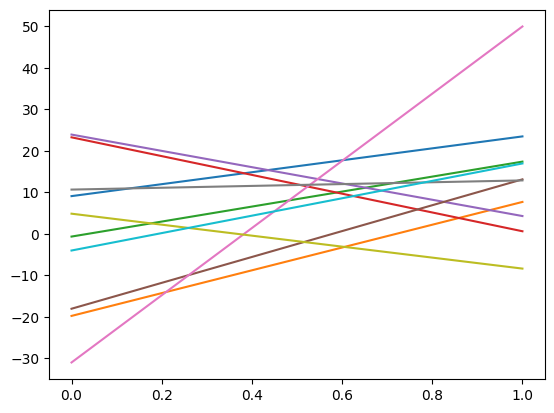

In [3522]:
plt.plot(velocities)

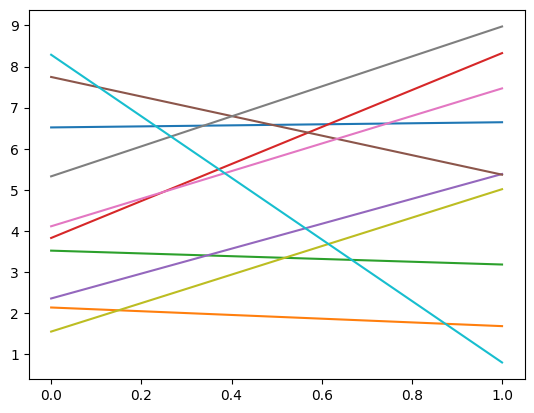

In [3523]:
plt.plot(positions)

In [3524]:
def compute_radial_distribution(positions, size, N_atoms, num_bins):
    """Compute the radial distribution function (g(r)) for a given set of coordinates."""
    rdf = np.zeros(num_bins)
    bin_width = size / (2 * num_bins)
    positions = np.random.rand(N_atoms, size)
    for i in range(N_atoms - 1):
        for j in range(i + 1, N_atoms):
            dx = positions[i, 0] - positions[j, 0]
            dy = positions[i, 1] - positions[j, 1]
    # Apply periodic boundary conditions
            dx -= size * np.round(dx / size)
            dy -= size * np.round(dy / size)

            r = np.sqrt(dx ** 2 + dy ** 2)
            
    # Assign particles to bins and increment the respective bin count
            bin_index = int(r / bin_width)
            if bin_index < num_bins:
                rdf[bin_index] += 2  # Increase count for pair (i, j)       
    
    # Normalize the radial distribution function
    density = N_atoms / (size ** 3)
    shell_volume = (4 / 3) * np.pi * (bin_width ** 3) * np.arange(1, num_bins + 1) ** 3
    normalization = 4 * np.pi * density * shell_volume
    rdf /= normalization
    return rdf

In [3546]:
N_atoms = 2
densities = [0.002] 
num_bins = 100
size = 10

# Perform simulations for different densities
for density in densities:
    rdf = compute_radial_distribution(positions, size, N_atoms, num_bins)
    
    r = np.linspace(0, size / 2, num_bins)

In [3547]:
print(rdf)

[  0.           0.           0.           0.           0.
   0.           0.           0.           0.         151.98177546
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0. 

In [3548]:
print(r)

[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

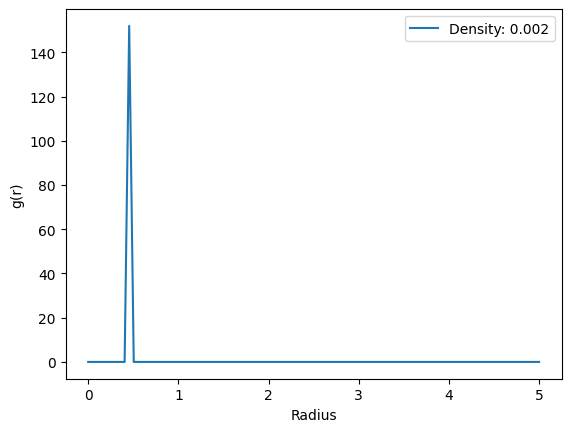

In [3549]:
plt.plot(r,rdf, label=f'Density: {density}')
plt.xlabel('Radius')
plt.ylabel('g(r)')
plt.legend()
plt.show()

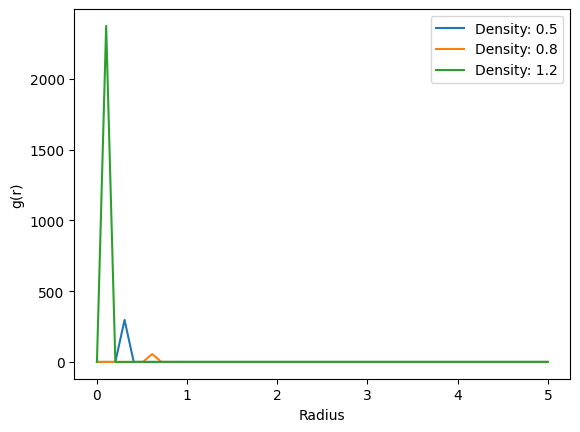

In [2672]:
N_atoms = 2
densities = [0.5, 0.8, 1.2]  # Varying densities
num_bins = 50
size = 10

# Perform simulations for different densities
for density in densities:
    rdf = compute_radial_distribution(positions, size, N_atoms, num_bins)
    
    r = np.linspace(0, size / 2, num_bins)
    
    # Plot g(r)
    plt.plot(r, rdf, label=f'Density: {density}')
    
plt.xlabel('Radius')
plt.ylabel('g(r)')
plt.legend()
plt.show()